# Underfitting vs. Overfitting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [3]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

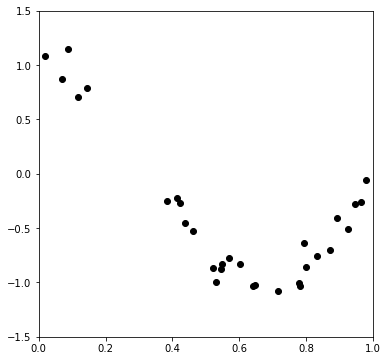

In [4]:
# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

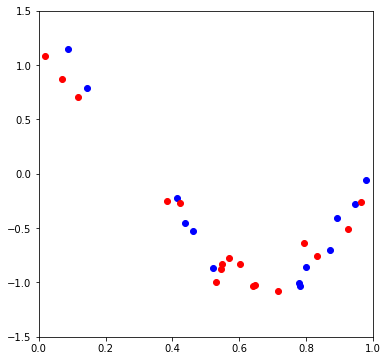

In [5]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics

In [7]:
from sklearn import linear_model

X1=np.vstack(X1)
model1 = linear_model.LinearRegression()
model1.fit(X1, y1)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_ylim([-1.5,1.5])
axes.set_xlim([0,1])
plt.scatter(X1, y1,  color='red')
plt.plot(X1, model1.predict(X1), color='red',linewidth=3)
X2=np.vstack(X2)
model1 = linear_model.LinearRegression()
model1.fit(X2, y2)
plt.scatter(X2, y2,  color='blue')
plt.plot(X2, model1.predict(X2), color='blue',linewidth=3)
plt.show()




ValueError: Expected 2D array, got 1D array instead:
array=[0.0871293  0.14335329 0.41466194 0.43758721 0.46147936 0.52184832
 0.77815675 0.78052918 0.79915856 0.87001215 0.891773   0.94466892
 0.97861834].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
model3 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model3.fit(X1, y1)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_ylim([-1.5,1.5])
axes.set_xlim([0,1])
plt.scatter(X1, y1,  color='red')
x_plot = np.vstack(np.linspace(0, 10, 1000))
plt.plot(x_plot, model3.predict(x_plot), color='red',linewidth=3)
model2x2 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model2x2.fit(X2, y2)
plt.scatter(X2, y2,  color='blue')
x_plot = np.vstack(np.linspace(0, 10, 1000))
plt.plot(x_plot, model2x2.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.
